In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from apad_env import APADEnv

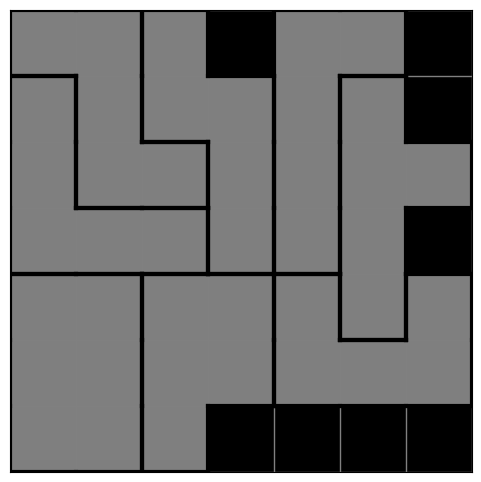

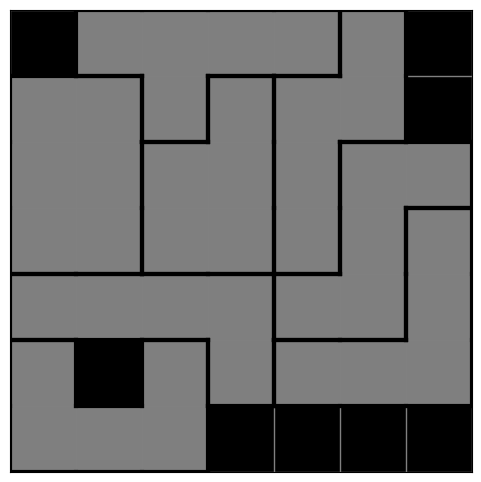

In [113]:
obs_list = []
action_list = []
episode_starts = []
first_step = True

# example 1: april 14
env = APADEnv(4,14)
obs,info = env.reset()
action_list.append(env.encode_action(7,0,0,0))
action_list.append(env.encode_action(1,0,0,2))
action_list.append(env.encode_action(2,0,1,32))
action_list.append(env.encode_action(0,1,0,12))
action_list.append(env.encode_action(6,0,0,4))
action_list.append(env.encode_action(3,0,0,7))
action_list.append(env.encode_action(4,0,0,28))
action_list.append(env.encode_action(5,0,0,30))

for action in action_list:
    obs, reward, terminated, truncated, info = env.step(action)
    obs_list.append(obs)
    episode_starts.append(first_step)
    first_step = False

env.visualize()

# example 2: Jan 23
env = APADEnv(1,23)
first_step = True
obs,info = env.reset()

action_list_2 = []
action_list_2.append(env.encode_action(0,0,3,1))
action_list_2.append(env.encode_action(1,1,2,4))
action_list_2.append(env.encode_action(2,0,1,35))
action_list_2.append(env.encode_action(3,0,1,25))
action_list_2.append(env.encode_action(4,0,0,7))
action_list_2.append(env.encode_action(5,0,2,9))
action_list_2.append(env.encode_action(6,0,3,28))
action_list_2.append(env.encode_action(7,1,0,18))

for action in action_list_2:
    obs, reward, terminated, truncated, info = env.step(action)
    obs_list.append(obs)
    action_list.append(action)
    episode_starts.append(first_step)
    first_step = False

env.visualize()

In [ ]:
        mask = env.action_masks()              # boolean array
        valid_actions = np.flatnonzero(mask)   # integer indices of True values

        if valid_actions.size == 0:

In [121]:
print(len(obs_list))
print(len(action_list))
print(len(episode_starts))
print(episode_starts)
print(obs_list[4])

16
16
16
[True, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False]
[ 8  8  2 -1  7  7 -1  0  8  2  2  7  1 -1  0  8  8  2  7  1  1  0  0  0
  2  7  1 -1  0  0  0  0  3  1  3  0  0  0  0  3  3  3  0  0  0 -1 -1 -1
 -1  0  0  0  1  1  1  0  0]


In [122]:
# Save to demo.npz
np.savez(
    "demo.npz",
    observations=np.array(obs_list),
    actions=np.array(action_list),
    episode_starts=np.array(episode_starts)
)